In [2]:
%matplotlib inline

import gzip
import pickle
from urllib.request import urlretrieve

import matplotlib.pyplot as plt
import nengo
from nengo.utils.matplotlib import rasterplot
import numpy as np
import tensorflow as tf

import nengo_dl

Instructions for updating:
non-resource variables are not supported in the long term


Build finished in 0:00:00                                                      
Optimization finished in 0:00:00                                               
Construction finished in 0:00:00                                               
Simulation finished in 0:00:02                                                 
Build finished in 0:00:00                                                      
Optimization finished in 0:00:00                                               
Construction finished in 0:00:00                                               
Simulation finished in 0:00:02                                                 
Build finished in 0:00:00                                                      
Optimization finished in 0:00:00                                               
|             Constructing graph: build stage (0%)             | ETA:  --:--:--

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:55: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


Construction finished in 0:00:00                                               
Simulation finished in 0:00:03                                                 
Build finished in 0:00:00                                                      
Optimization finished in 0:00:00                                               
Construction finished in 0:00:00                                               
Simulation finished in 0:00:02                                                 


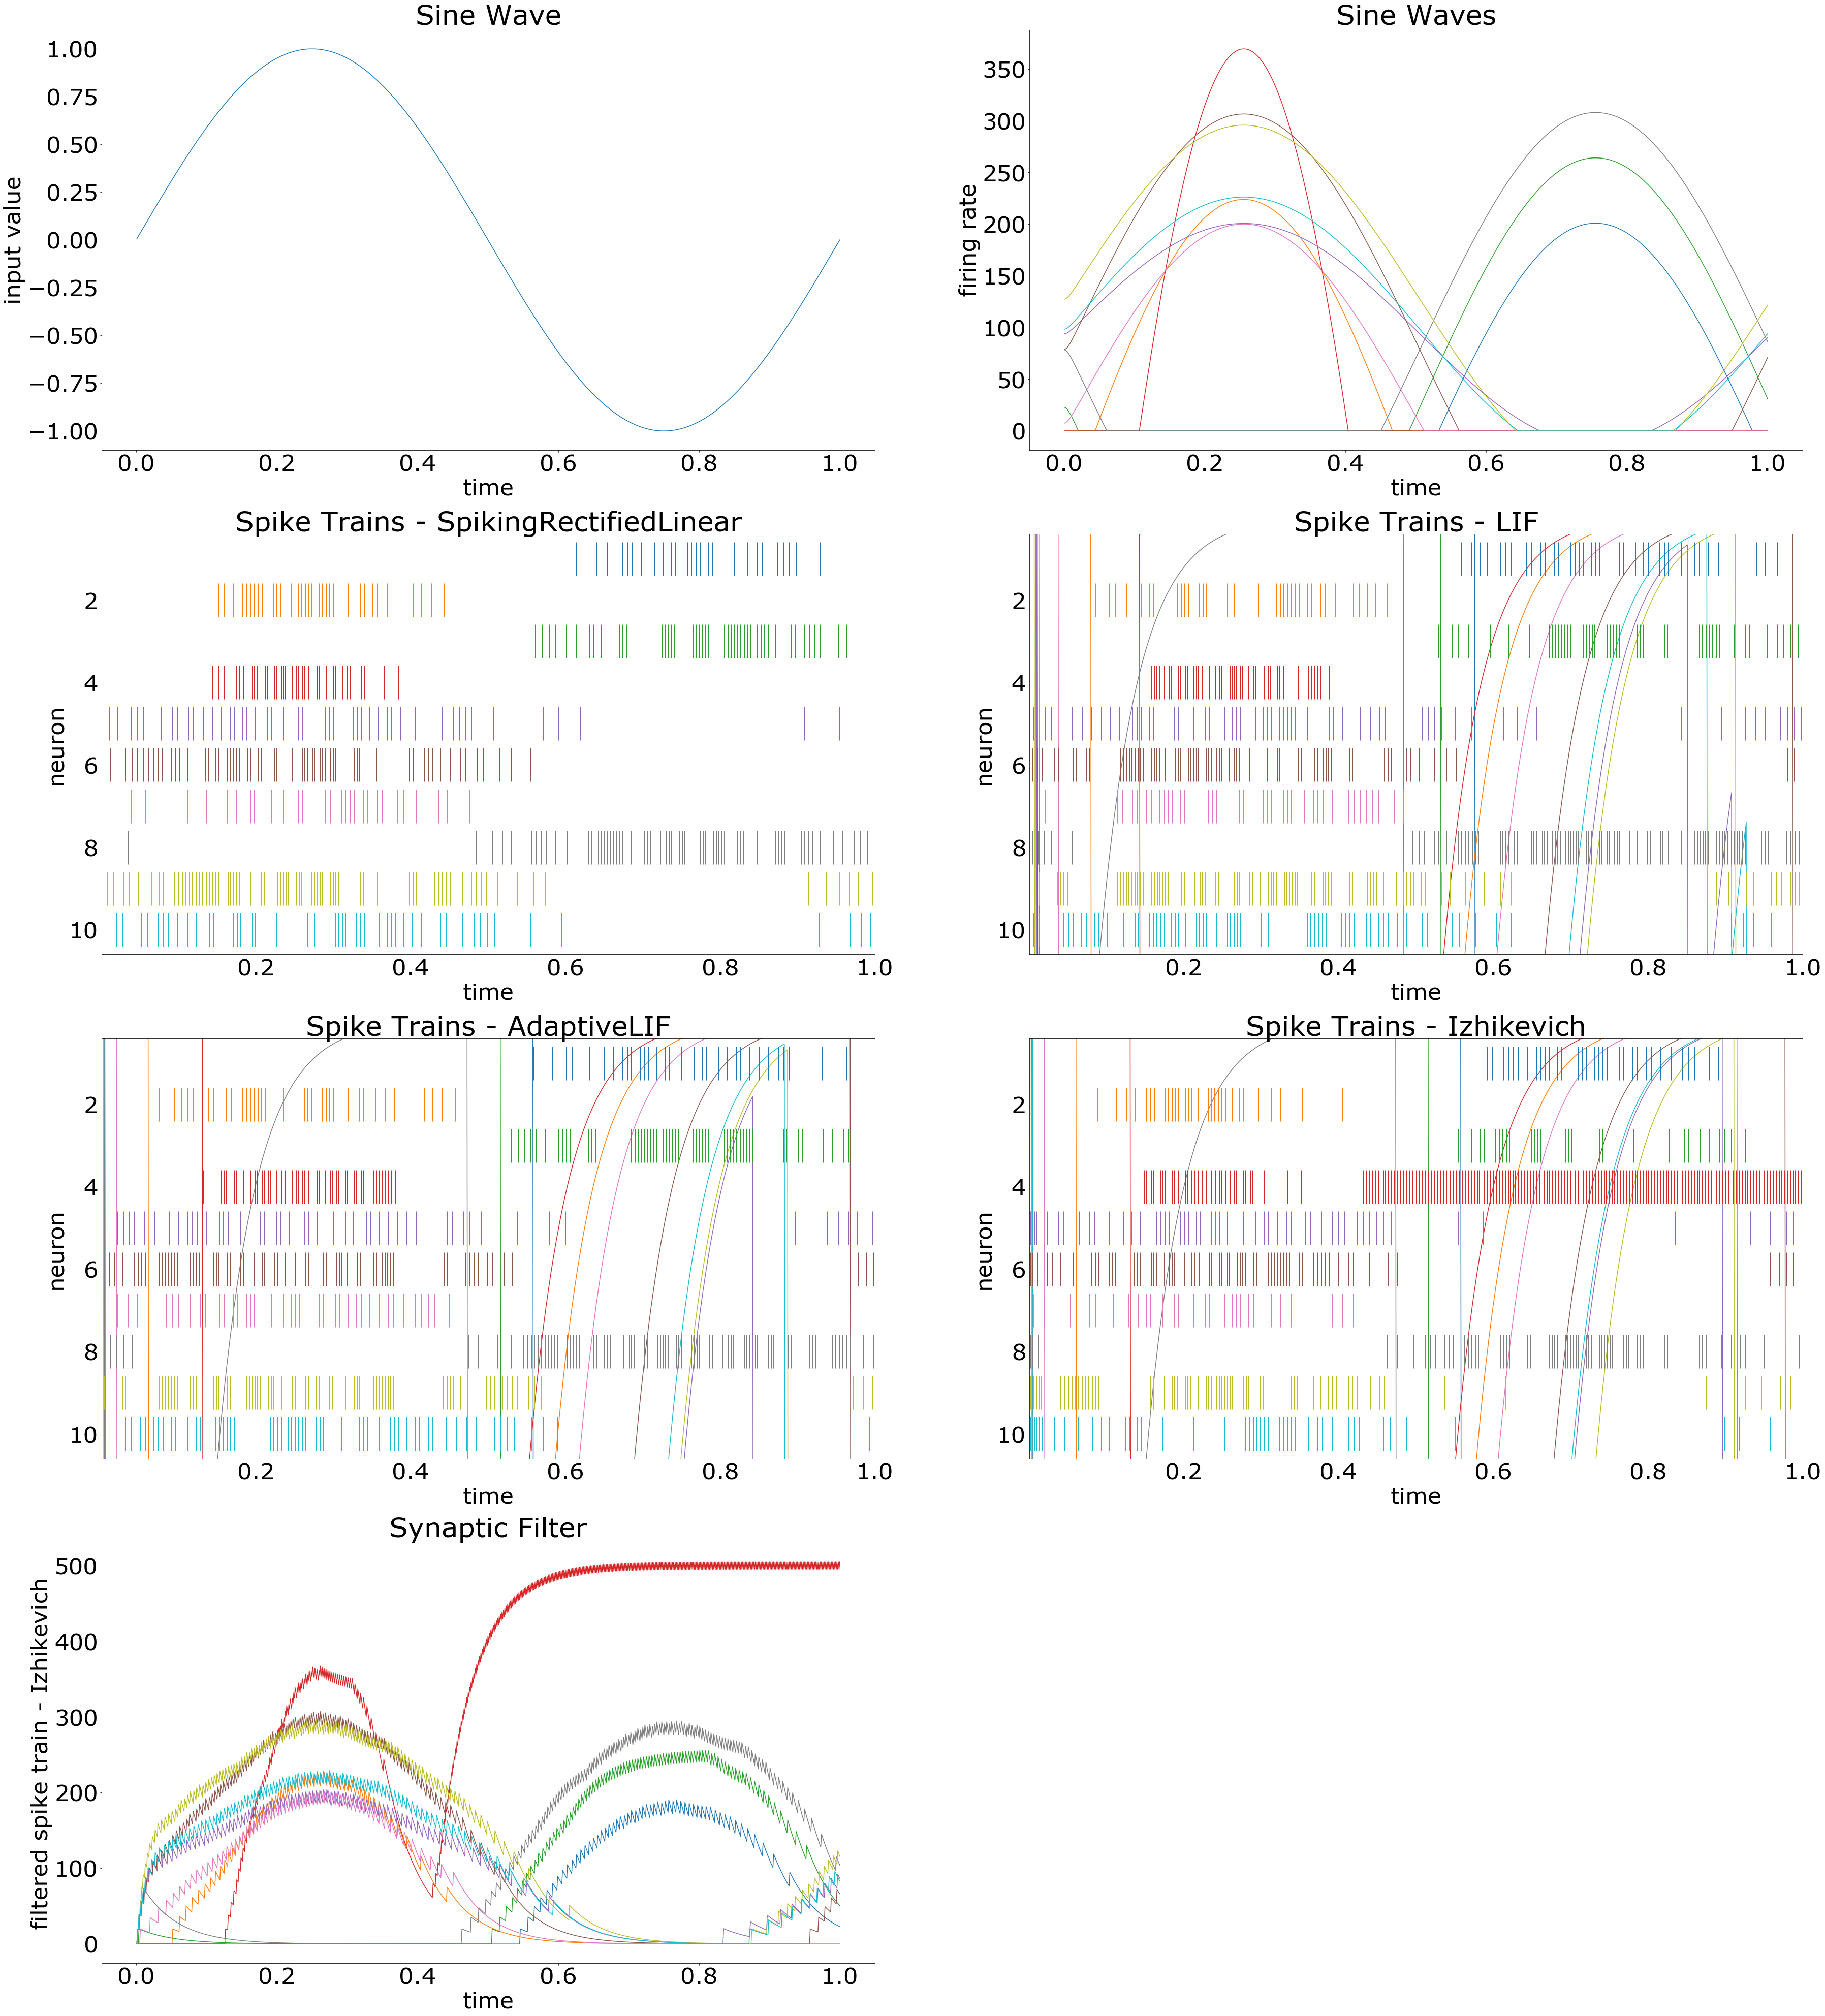

In [25]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 60
fig_size[1] = 70
plt.rcParams["figure.figsize"] = fig_size
font = {'family' : 'Verdana',
        'weight' : 'normal',
        'size'   : 45}

plt.rc('font', **font)

path = 'Images/'
neurons = [nengo.SpikingRectifiedLinear(), nengo.LIF(), 
           nengo.AdaptiveLIF(), nengo.Izhikevich()]
max_len = len(neurons)
for i, n in enumerate(neurons):
    with nengo.Network() as net:
        # our input node will output a sine wave with a period of 1 second
        a = nengo.Node(lambda t: np.sin(2 * np.pi * t))

        # we'll create one ensemble with rate neurons
        b_rate = nengo.Ensemble(
            10, 1, neuron_type=nengo.RectifiedLinear(), seed=2)
        nengo.Connection(a, b_rate)

        # and another ensemble with spiking neurons
        b_spike = nengo.Ensemble(
            10, 1, neuron_type=n, seed=2)
        nengo.Connection(b_rate, b_spike)

        p_a = nengo.Probe(a)
        p_rate = nengo.Probe(b_rate.neurons)
        p_spike = nengo.Probe(b_spike.neurons)

    with nengo_dl.Simulator(net) as sim:
        # simulate the model for 1 second
        sim.run(1.0)
        
    if i== 0:
        plt.subplot(max_len, 2, 1)
        #plt.figure()
        plt.plot(sim.trange(), sim.data[p_a])
        plt.xlabel("time")
        plt.ylabel("input value")
        plt.title("Sine Wave")
        #plt.savefig('{}analogue.png'.format(path), bbox_inches='tight')
        
        plt.subplot(max_len, 2, 2)
        #plt.figure()
        plt.plot(sim.trange(), sim.data[p_rate])
        plt.xlabel("time")
        plt.ylabel("firing rate")
        plt.title("Sine Waves")
        #plt.savefig('{}rate.png'.format(path), bbox_inches='tight')

    plt.subplot(max_len, 2, 3+i)
    #plt.figure()
    rasterplot(sim.trange(), sim.data[p_spike])
    plt.xlabel("time")
    plt.ylabel("neuron")
    plt.title("Spike Trains - {}".format(str(n)[:-2]))
    #plt.savefig('{}[spikes]{}.png'.format(path, str(n)[:-2]), bbox_inches='tight')
    
    # nengo uses a linear lowpass filter by default
    filt = nengo.Lowpass(tau=0.05)

    # apply filter to ensemble output spikes
    filtered_spikes = filt.filt(sim.data[p_spike])

    plt.subplot(max_len, 2, 4+i)
    #plt.figure()
    plt.plot(sim.trange(), filtered_spikes)
    plt.xlabel("time")
    plt.ylabel("filtered spike train - {}".format(str(n)[:-2]))
    plt.title("Synaptic Filter")
    #plt.savefig('{}[filtered_spikes]{}.png'.format(path, str(n)[:-2]), bbox_inches='tight')

plt.savefig('{}[filtered_spikes]{}.png'.format(path, str(n)[:-2]), bbox_inches='tight')